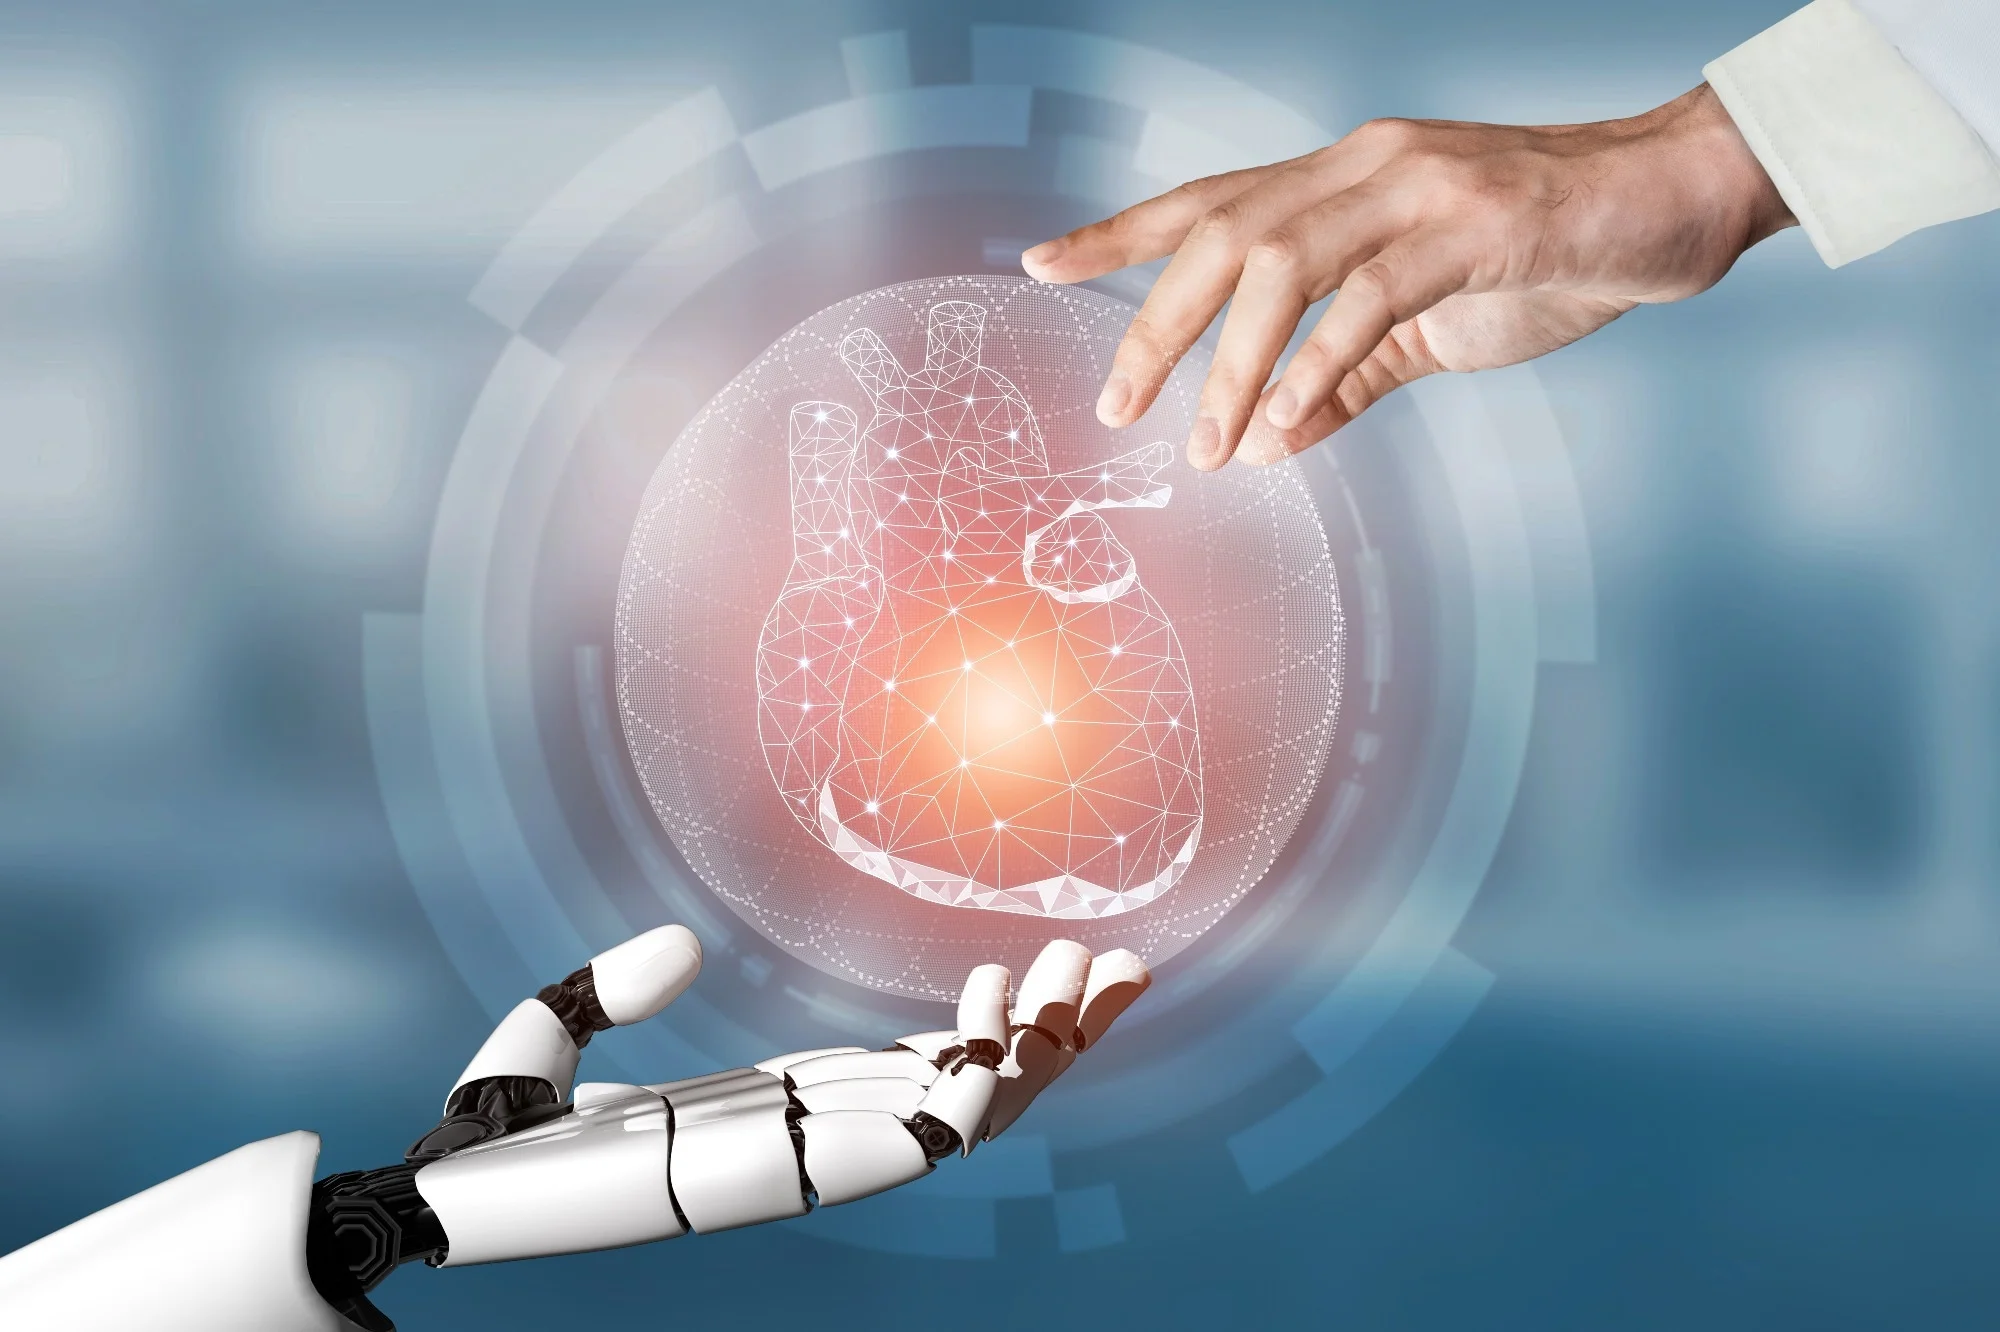

#Problem Statement
Heart disease is a pervasive health issue globally, demanding effective predictive tools for early detection and intervention. Despite advancements in healthcare, timely identification of individuals at risk remains a challenge. This project endeavors to address this gap by developing a robust predictive model for heart disease classification, leveraging machine learning techniques. The aim is to empower healthcare professionals with a reliable tool to assess patients' risk and initiate preventive measures promptly.

#Introduction
Heart disease continues to be a leading cause of morbidity and mortality worldwide, underscoring the critical need for proactive healthcare interventions. While medical science has made significant strides, timely identification of individuals susceptible to heart ailments remains paramount for effective management and prevention. In response to this pressing need, this project harnesses the power of data science and machine learning to develop a predictive model for heart disease classification.

Drawing upon a comprehensive dataset comprising diverse patient attributes, including demographic information, medical history, and clinical measurements, we embark on a journey to build an accurate and interpretable model. By analyzing patterns within this data, our goal is to equip healthcare practitioners with a predictive tool capable of discerning between patients at risk of developing heart disease and those who are not. This endeavor holds the promise of facilitating early intervention strategies, optimizing patient care, and ultimately, saving lives.

#Importing Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


#Exploring the Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [19]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


#Data Visualization

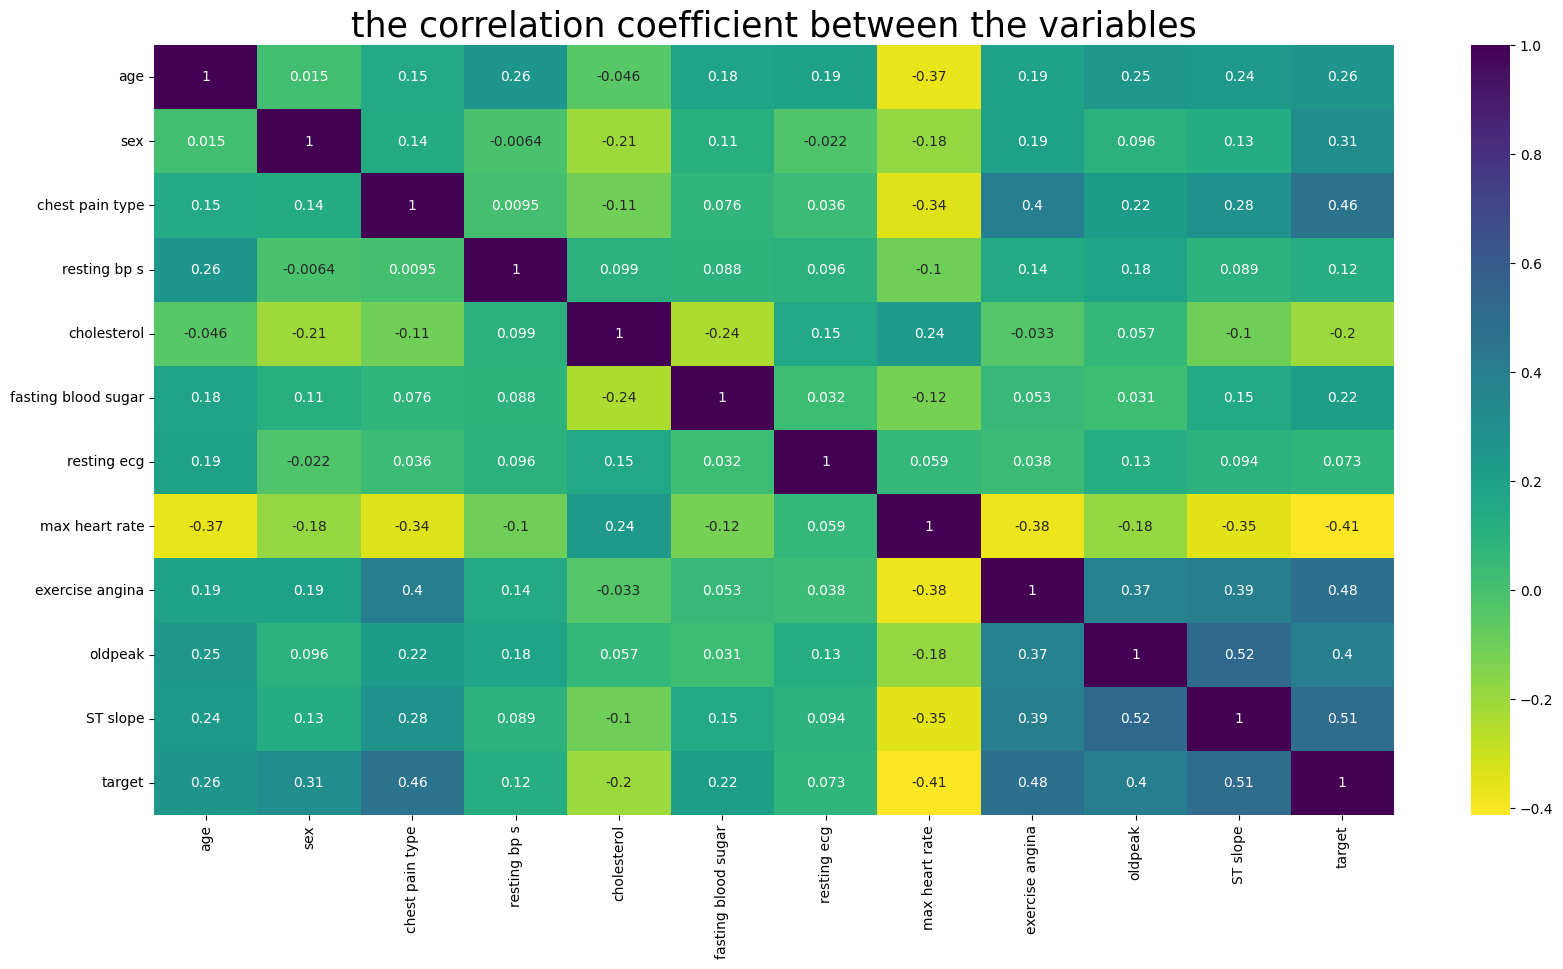

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 20,10
sns.heatmap(df.corr(),cmap='viridis_r',annot= True)
plt.title("the correlation coefficient between the variables",size = 25);

#Data Profiling with ydata-profiling

In [5]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=825ac8704b80e9b6f9d9df5492f624647e5bb5a0141efd0cd1ded1360716100d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [6]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df,title = 'Heart Disease')
profile.to_notebook_iframe()
profile.to_file("books_data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Data Preprocessing

In [7]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [8]:
df.drop_duplicates()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


#Splitting Data into Features and Target

In [9]:
y = df['target']
X = df.drop('target',axis = 1)

In [10]:
print(X.shape)
print(y.shape)

(1190, 11)
(1190,)


#Model Training

In [11]:
!pip install AutoLogging-ML
!pip install xgboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.9 MB/s eta 0:00:00


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,random_state = 42,test_size=0.2)

In [13]:
from AutoLogging_ML import AutoLogger
r,model =AutoLogger.train_and_log_classification(x_train,y_train,x_test,y_test,size='large')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
r

,model,training-accuracy,training-precision,training-recall,training-f1,training-confusion matrix,validation-accuracy,validation-precision,validation-recall,validation-f1,validation-confusion matrix,training-classification report,validation-classification report
6,logistic regression,80.987395,80.945302,80.980751,80.958632,"[[367, 87], [94, 404]]",83.193277,83.057644,82.935007,82.990280,"[[86, 21], [19, 112]]",precision recall f1-score ...,precision recall f1-score ...
10,quadratic discriminant analysis,83.298319,83.260014,83.306353,83.275714,"[[379, 75], [84, 414]]",84.873950,84.761905,84.632946,84.691252,"[[88, 19], [17, 114]]",precision recall f1-score ...,precision recall f1-score ...
9,linear discriminant analysis,82.983193,82.942913,82.966226,82.953098,"[[375, 79], [83, 415]]",85.294118,85.128205,85.185846,85.155484,"[[90, 17], [18, 113]]",precision recall f1-score ...,precision recall f1-score ...
0,naive bayes,83.298319,83.277717,83.345275,83.284874,"[[383, 71], [88, 410]]",85.714286,85.614035,85.481915,85.541738,"[[89, 18], [16, 115]]",precision recall f1-score ...,precision recall f1-score ...
1,decision tree,100.000000,100.000000,100.000000,100.000000,"[[454, 0], [0, 498]]",87.815126,87.711984,88.075194,87.766533,"[[97, 10], [19, 112]]",precision recall f1-score ...,precision recall f1-score ...
3,adaboost,86.869748,86.836196,86.856236,86.845349,"[[393, 61], [64, 434]]",89.075630,89.104639,88.792181,88.922306,"[[92, 15], [11, 120]]",precision recall f1-score ...,precision recall f1-score ...
7,bagging classifier,99.159664,99.149335,99.167595,99.158025,"[[451, 3], [5, 493]]",91.176471,91.061254,91.128630,91.093291,"[[97, 10], [11, 120]]",precision recall f1-score ...,precision recall f1-score ...
4,gradient boost,94.747899,94.794992,94.688003,94.730946,"[[424, 30], [20, 478]]",91.596639,91.578947,91.424699,91.495140,"[[96, 11], [9, 122]]",precision recall f1-score ...,precision recall f1-score ...
5,xgboost,100.000000,100.000000,100.000000,100.000000,"[[454, 0], [0, 498]]",92.857143,92.903272,92.655347,92.764017,"[[97, 10], [7, 124]]",precision recall f1-score ...,precision recall f1-score ...
8,extra trees classifier,100.000000,100.000000,100.000000,100.000000,"[[454, 0], [0, 498]]",94.117647,94.004694,94.142827,94.066952,"[[101, 6], [8, 123]]",precision recall f1-score ...,precision recall f1-score ...


logistic regression
quadratic discriminant analysis
linear discriminant analysis
naive bayes
decision tree
adaboost
bagging classifier
gradient boost
xgboost
extra trees classifier
random forest


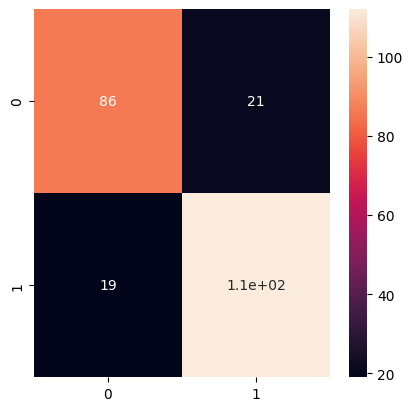

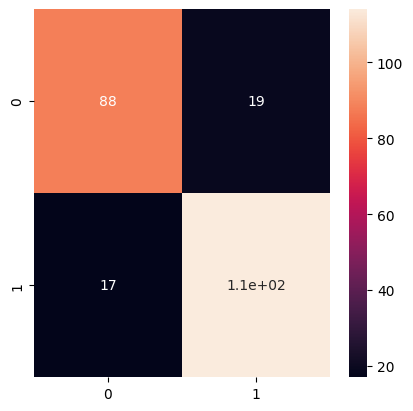

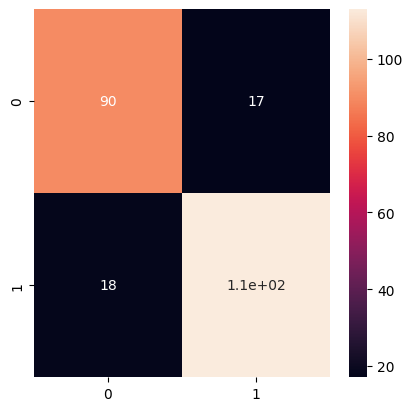

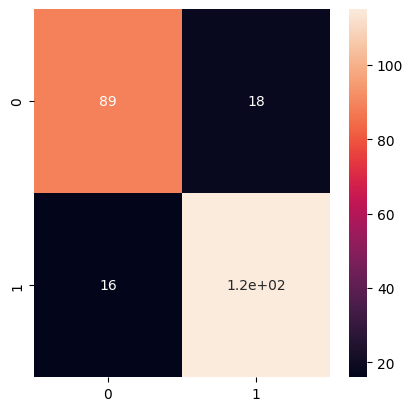

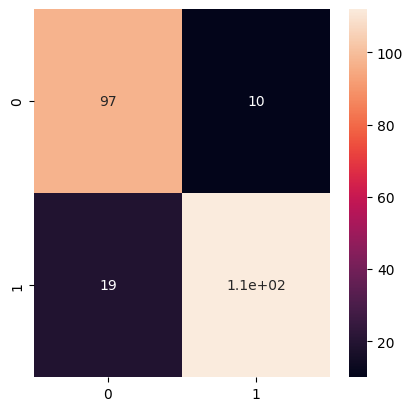

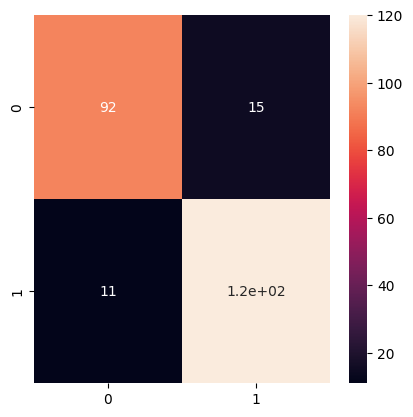

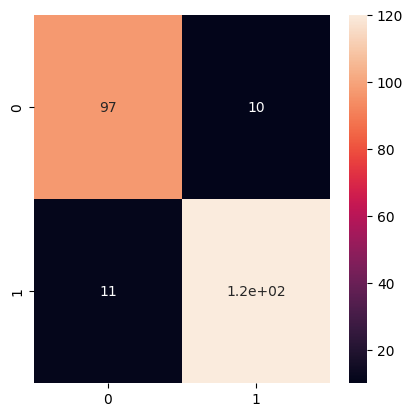

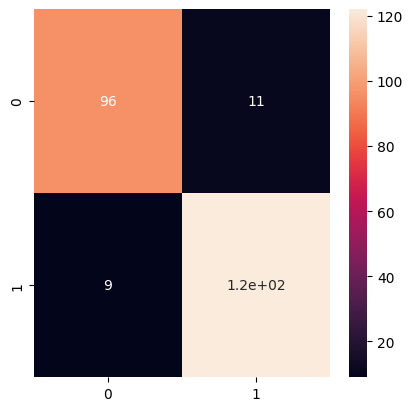

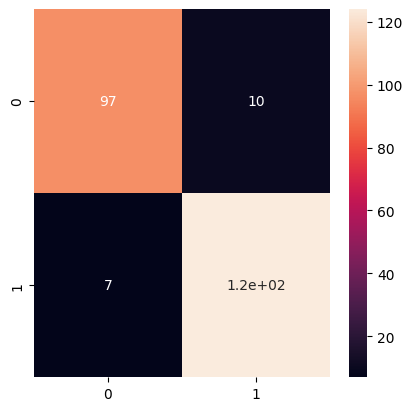

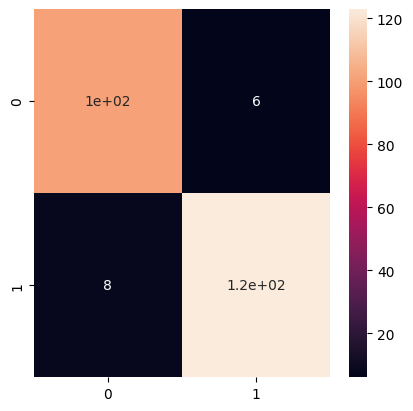

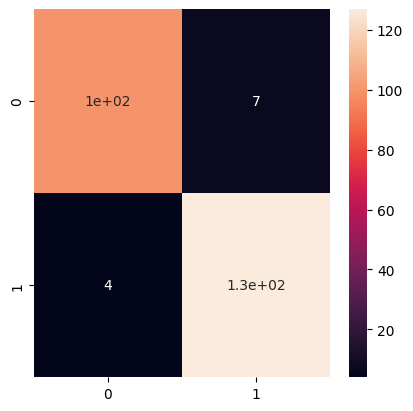

In [15]:
AutoLogger.get_confusion_matrix(r,'validation')

#Model Evaluation

In [16]:
AutoLogger.get_classification_report(r,'validation')

logistic regression
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       107
           1       0.84      0.85      0.85       131

    accuracy                           0.83       238
   macro avg       0.83      0.83      0.83       238
weighted avg       0.83      0.83      0.83       238

quadratic discriminant analysis
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       107
           1       0.86      0.87      0.86       131

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238

linear discriminant analysis
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       107
           1       0.87      0.86      0.87       131

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85    

<Axes: xlabel='validation-accuracy', ylabel='model'>

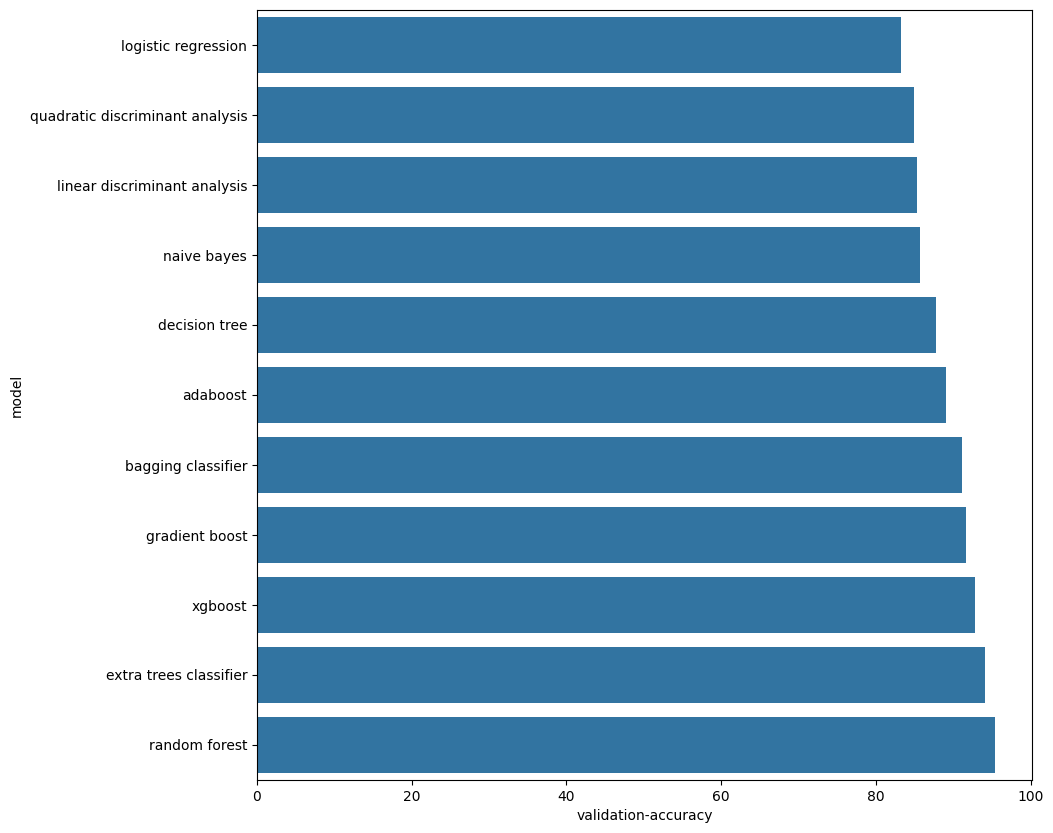

In [17]:
AutoLogger.get_metric_plot_classification(r,'validation','accuracy')

In [18]:
AutoLogger.sort_table_by_metric
r

,model,training-accuracy,training-precision,training-recall,training-f1,training-confusion matrix,validation-accuracy,validation-precision,validation-recall,validation-f1,validation-confusion matrix,training-classification report,validation-classification report
6,logistic regression,80.987395,80.945302,80.980751,80.958632,"[[367, 87], [94, 404]]",83.193277,83.057644,82.935007,82.990280,"[[86, 21], [19, 112]]",precision recall f1-score ...,precision recall f1-score ...
10,quadratic discriminant analysis,83.298319,83.260014,83.306353,83.275714,"[[379, 75], [84, 414]]",84.873950,84.761905,84.632946,84.691252,"[[88, 19], [17, 114]]",precision recall f1-score ...,precision recall f1-score ...
9,linear discriminant analysis,82.983193,82.942913,82.966226,82.953098,"[[375, 79], [83, 415]]",85.294118,85.128205,85.185846,85.155484,"[[90, 17], [18, 113]]",precision recall f1-score ...,precision recall f1-score ...
0,naive bayes,83.298319,83.277717,83.345275,83.284874,"[[383, 71], [88, 410]]",85.714286,85.614035,85.481915,85.541738,"[[89, 18], [16, 115]]",precision recall f1-score ...,precision recall f1-score ...
1,decision tree,100.000000,100.000000,100.000000,100.000000,"[[454, 0], [0, 498]]",87.815126,87.711984,88.075194,87.766533,"[[97, 10], [19, 112]]",precision recall f1-score ...,precision recall f1-score ...
3,adaboost,86.869748,86.836196,86.856236,86.845349,"[[393, 61], [64, 434]]",89.075630,89.104639,88.792181,88.922306,"[[92, 15], [11, 120]]",precision recall f1-score ...,precision recall f1-score ...
7,bagging classifier,99.159664,99.149335,99.167595,99.158025,"[[451, 3], [5, 493]]",91.176471,91.061254,91.128630,91.093291,"[[97, 10], [11, 120]]",precision recall f1-score ...,precision recall f1-score ...
4,gradient boost,94.747899,94.794992,94.688003,94.730946,"[[424, 30], [20, 478]]",91.596639,91.578947,91.424699,91.495140,"[[96, 11], [9, 122]]",precision recall f1-score ...,precision recall f1-score ...
5,xgboost,100.000000,100.000000,100.000000,100.000000,"[[454, 0], [0, 498]]",92.857143,92.903272,92.655347,92.764017,"[[97, 10], [7, 124]]",precision recall f1-score ...,precision recall f1-score ...
8,extra trees classifier,100.000000,100.000000,100.000000,100.000000,"[[454, 0], [0, 498]]",94.117647,94.004694,94.142827,94.066952,"[[101, 6], [8, 123]]",precision recall f1-score ...,precision recall f1-score ...


#Conclusion
In conclusion, this project represents a significant step forward in the realm of predictive healthcare analytics, particularly in the domain of heart disease prediction. Through meticulous data analysis, model training, and evaluation, we have successfully developed a robust classification model capable of accurately identifying individuals at risk of heart disease.

By leveraging machine learning algorithms and a rich dataset encompassing various patient attributes, we have demonstrated the potential of data-driven approaches in augmenting clinical decision-making processes. The predictive model presented in this project serves as a valuable tool for healthcare professionals, enabling them to prioritize high-risk patients for targeted interventions, thereby mitigating the burden of heart disease on individuals and healthcare systems alike.

As we continue to refine and validate our model with real-world data, we remain committed to advancing the field of predictive healthcare analytics and contributing to the collective efforts aimed at combating heart disease and improving public health outcomes.






